In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
%cd /content/drive/My Drive/Colab Notebooks/Research/GazeSemgIntegration/more_features

/content/drive/My Drive/Colab Notebooks/Research/GazeSemgIntegration/more_features


In [107]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import lightgbm as ltb
from copy import deepcopy
import warnings
import math


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

warnings.filterwarnings('ignore')

# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [108]:
acc_arr = []
name_arr = []

# All Left of turning point

## Raw training data(after overlapped windows)

In [109]:
trainx_raw = pd.read_csv('featured_data/step10ms/combined_trainx.csv')
trainy_raw = pd.read_csv('featured_data/step10ms/combined_trainy.csv')

## Raw testing data(after overlapped windows)

In [110]:
testx_raw = pd.read_csv('featured_data/step10ms/combined_testx.csv')
testy_raw = pd.read_csv('featured_data/step10ms/combined_testy.csv')

## Find transition zone train/test data

### Train data set

In [111]:
current_index_list = []
last_value = 1
current_value = 0
trainx_tran = deepcopy(trainx_raw)
trainy_tran = deepcopy(trainy_raw)

for i in tqdm(range(0, len(trainy_raw))):
    current_value = trainy_raw.iloc[i,0]
    if current_value == last_value:
        last_value = current_value

        current_index_list.append(i)
        if i == len(trainy_raw) - 1:
            trainx_tran = trainx_tran.drop(current_index_list)
            trainy_tran = trainy_tran.drop(current_index_list)
    else:
        last_value = current_value
        if current_value == 0:
            trainx_tran = trainx_tran.drop(current_index_list)
            trainy_tran = trainy_tran.drop(current_index_list)
            
            current_index_list = []
            current_index_list.append(i)
        else:
            trainy_tran.loc[current_index_list, '0'] = current_value
            current_index_list = []
            current_index_list.append(i)

In [112]:
# trainx_tran

#### check the raw label and adjusted label

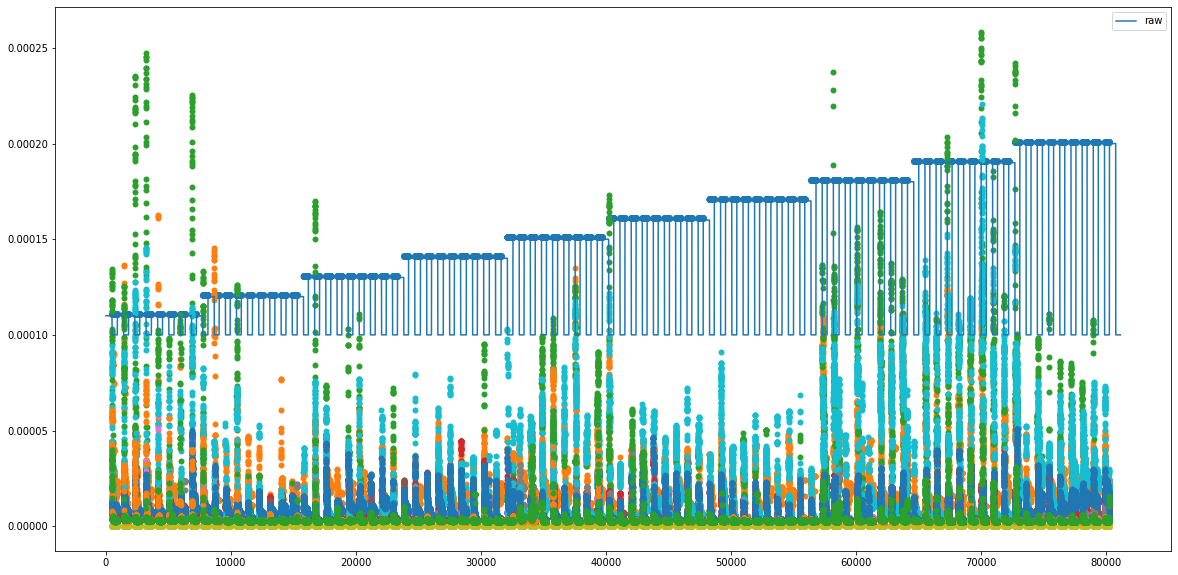

In [113]:
index = []
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(trainy_raw*0.00001+0.0001)
line1.set_label('raw')

index = trainy_tran.index
plt.scatter(index, trainy_tran*0.00001+0.0001+0.000001, linewidths=0.0000001)

for i in tqdm(range(0,12)):
    plt.scatter(index, trainx_tran[str(i)], linewidths=0.0000001)
    
ax.legend()
plt.show();

### Test data set

In [114]:
current_index_list = []
last_value = 1
current_value = 0
testx_tran = deepcopy(testx_raw)
testy_tran = deepcopy(testy_raw)

for i in tqdm(range(0, len(testy_raw))):
    current_value = testy_raw.iloc[i,0]
    if current_value == last_value:
        last_value = current_value

        current_index_list.append(i)
        if i == len(testy_raw) - 1:
            testx_tran = testx_tran.drop(current_index_list)
            testy_tran = testy_tran.drop(current_index_list)
    else:
        last_value = current_value
        if current_value == 0:
            testx_tran = testx_tran.drop(current_index_list)
            testy_tran = testy_tran.drop(current_index_list)
            
            current_index_list = []
            current_index_list.append(i)
        else:
            testy_tran.loc[current_index_list, '0'] = current_value
            current_index_list = []
            current_index_list.append(i)

#### check the raw label and adjusted label

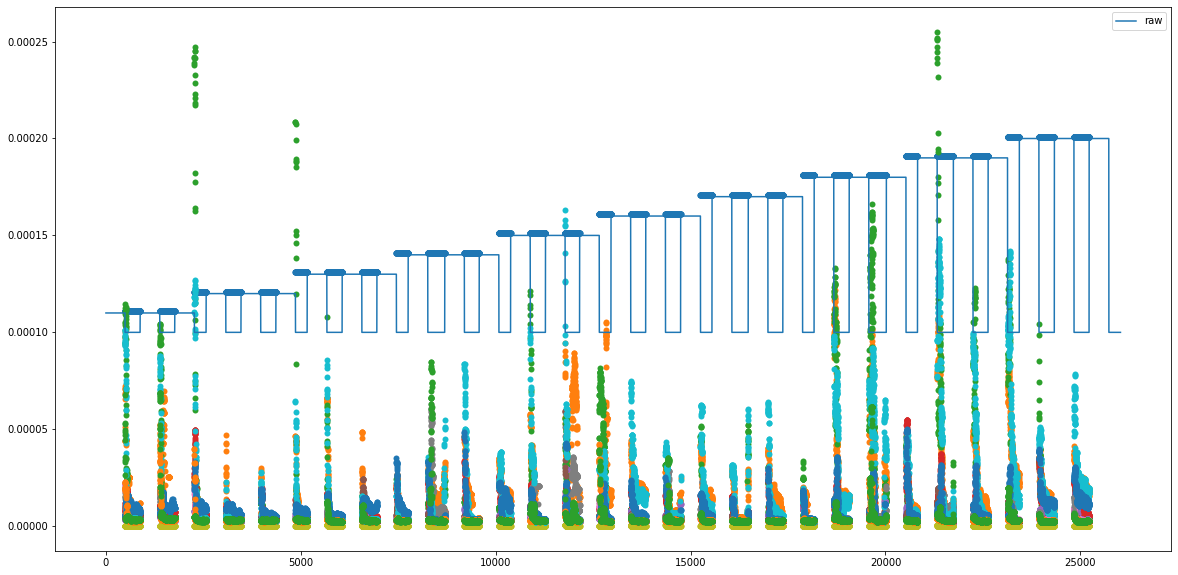

In [115]:
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(testy_raw*0.00001+0.0001)
line1.set_label('raw')

index = testy_tran.index
plt.scatter(index, testy_tran*0.00001+0.0001+0.000001, linewidths=0.0000001)

for i in tqdm(range(0,12)):
    plt.scatter(index, testx_tran[str(i)], linewidths=0.0000001)

ax.legend()
plt.show();

### reindex new train/test data set

In [116]:
trainx_tran = trainx_tran.reset_index(drop=True)
trainy_tran = trainy_tran.reset_index(drop=True)
testx_tran = testx_tran.reset_index(drop=True)
testy_tran = testy_tran.reset_index(drop=True)

## train/test model

In [117]:
# train/test model
lightGBM_model = ltb.LGBMClassifier()
lightGBM_model.fit(trainx_tran,trainy_tran)
expected1 = testy_tran.values.flatten()
predicted1 = lightGBM_model.predict(testx_tran)
counter = 0
for i in range(0, len(expected1)):
    if expected1[i] == predicted1[i]:
        counter += 1

accuracy = counter/len(expected1)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [118]:
name = 'All Left'
acc_arr.append(accuracy)
name_arr.append(name)

# 100ms right of turning point

## Raw training data(after overlapped windows)

In [119]:
trainx_raw = pd.read_csv('featured_data/step10ms/combined_trainx.csv')
trainy_raw = pd.read_csv('featured_data/step10ms/combined_trainy.csv')

## Raw testing data(after overlapped windows)

In [120]:
testx_raw = pd.read_csv('featured_data/step10ms/combined_testx.csv')
testy_raw = pd.read_csv('featured_data/step10ms/combined_testy.csv')

## Find transition zone train/test data

### Train data set

In [121]:
current_index_list = []
last_value = 1
current_value = 0
trainx_tran = deepcopy(trainx_raw)
trainy_tran = deepcopy(trainy_raw)

for i in tqdm(range(0, len(trainy_raw))):
    current_value = trainy_raw.iloc[i,0]
    if current_value == last_value:
        last_value = current_value

        current_index_list.append(i)
        if i == len(trainy_raw) - 1:
            trainx_tran = trainx_tran.drop(current_index_list)
            trainy_tran = trainy_tran.drop(current_index_list)
    else:
        last_value = current_value
        for j in range(0,7*5):
            current_index_list = np.delete(current_index_list, 0)
        if current_value == 0:
            trainx_tran = trainx_tran.drop(current_index_list)
            trainy_tran = trainy_tran.drop(current_index_list)
            
            current_index_list = []
            current_index_list.append(i)
        else:
            trainy_tran.loc[current_index_list, '0'] = current_value
            current_index_list = []
            current_index_list.append(i)

In [122]:
zero_arr = []
for i in range(0, len(trainy_tran)):
    if trainy_tran.iloc[i, 0] == 0:
        zero_arr.append(trainy_tran.index[i])

trainx_tran = trainx_tran.drop(zero_arr)
trainy_tran = trainy_tran.drop(zero_arr)

#### check the raw label and adjusted label

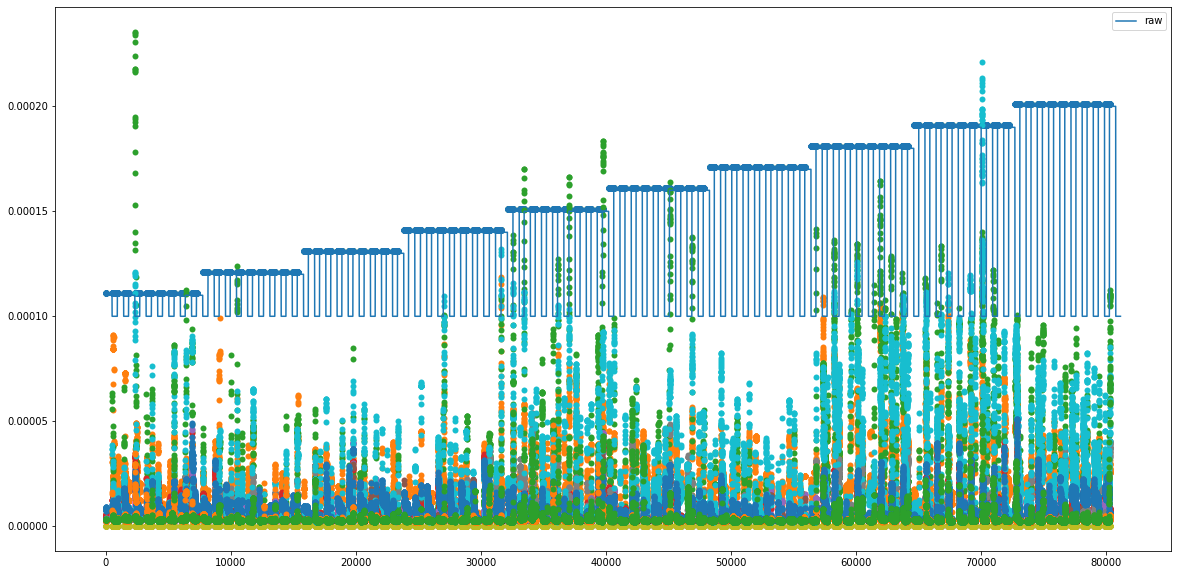

In [123]:
index = []
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(trainy_raw*0.00001+0.0001)
line1.set_label('raw')

index = trainy_tran.index
plt.scatter(index, trainy_tran*0.00001+0.0001+0.000001, linewidths=0.0000001)

for i in tqdm(range(0,12)):
    plt.scatter(index, trainx_tran[str(i)], linewidths=0.0000001)
    
ax.legend()
plt.show();

### Test data set

In [124]:
current_index_list = []
last_value = 1
current_value = 0
testx_tran = deepcopy(testx_raw)
testy_tran = deepcopy(testy_raw)

for i in tqdm(range(0, len(testy_raw))):
    
    current_value = testy_raw.iloc[i,0]
    if current_value == last_value:
        last_value = current_value

        current_index_list.append(i)
        if i == len(testy_raw) - 1:
            testx_tran = testx_tran.drop(current_index_list)
            testy_tran = testy_tran.drop(current_index_list)
    else:
        last_value = current_value
        for j in range(0,7*5):
            current_index_list = np.delete(current_index_list, 0)
        if current_value == 0:
            testx_tran = testx_tran.drop(current_index_list)
            testy_tran = testy_tran.drop(current_index_list)
            
            current_index_list = []
            current_index_list.append(i)
        else:
            testy_tran.loc[current_index_list, '0'] = current_value
            current_index_list = []
            current_index_list.append(i)
    
    # if i == 182:
    #     break

In [125]:
zero_arr = []
for i in range(0, len(testy_tran)):
    if testy_tran.iloc[i, 0] == 0:
        zero_arr.append(testy_tran.index[i])

testx_tran = testx_tran.drop(zero_arr)
testy_tran = testy_tran.drop(zero_arr)

#### check the raw label and adjusted label

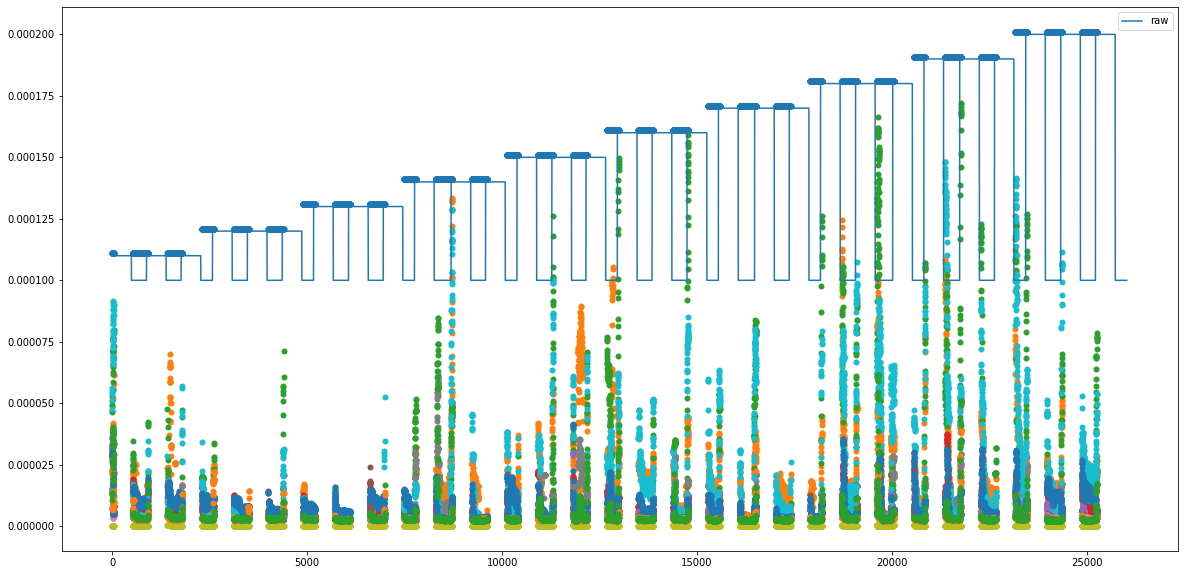

In [126]:
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(testy_raw*0.00001+0.0001)
line1.set_label('raw')

index = testy_tran.index
plt.scatter(index, testy_tran*0.00001+0.0001+0.000001, linewidths=0.0000001)

for i in tqdm(range(0,12)):
    plt.scatter(index, testx_tran[str(i)], linewidths=0.0000001)

ax.legend()
plt.show();

### reindex new train/test data set

In [127]:
trainx_tran = trainx_tran.reset_index(drop=True)
trainy_tran = trainy_tran.reset_index(drop=True)
testx_tran = testx_tran.reset_index(drop=True)
testy_tran = testy_tran.reset_index(drop=True)

## train/test model

In [128]:
# train/test model
lightGBM_model = ltb.LGBMClassifier()
lightGBM_model.fit(trainx_tran,trainy_tran)
expected1 = testy_tran.values.flatten()
predicted1 = lightGBM_model.predict(testx_tran)
counter = 0
for i in range(0, len(expected1)):
    if expected1[i] == predicted1[i]:
        counter += 1

accuracy = counter/len(expected1)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [129]:
name = '100ms right'
acc_arr.append(accuracy)
name_arr.append(name)

# 200ms right of turning point

## Raw training data(after overlapped windows)

In [130]:
trainx_raw = pd.read_csv('featured_data/step10ms/combined_trainx.csv')
trainy_raw = pd.read_csv('featured_data/step10ms/combined_trainy.csv')

## Raw testing data(after overlapped windows)

In [131]:
testx_raw = pd.read_csv('featured_data/step10ms/combined_testx.csv')
testy_raw = pd.read_csv('featured_data/step10ms/combined_testy.csv')

## Find transition zone train/test data

### Train data set

In [132]:
current_index_list = []
last_value = 1
current_value = 0
trainx_tran = deepcopy(trainx_raw)
trainy_tran = deepcopy(trainy_raw)

for i in tqdm(range(0, len(trainy_raw))):
    current_value = trainy_raw.iloc[i,0]
    if current_value == last_value:
        last_value = current_value

        current_index_list.append(i)
        if i == len(trainy_raw) - 1:
            trainx_tran = trainx_tran.drop(current_index_list)
            trainy_tran = trainy_tran.drop(current_index_list)
    else:
        last_value = current_value
        for j in range(0,14*5):
            current_index_list = np.delete(current_index_list, 0)
        if current_value == 0:
            trainx_tran = trainx_tran.drop(current_index_list)
            trainy_tran = trainy_tran.drop(current_index_list)
            
            current_index_list = []
            current_index_list.append(i)
        else:
            trainy_tran.loc[current_index_list, '0'] = current_value
            current_index_list = []
            current_index_list.append(i)

In [133]:
zero_arr = []
for i in range(0, len(trainy_tran)):
    if trainy_tran.iloc[i, 0] == 0:
        zero_arr.append(trainy_tran.index[i])

trainx_tran = trainx_tran.drop(zero_arr)
trainy_tran = trainy_tran.drop(zero_arr)

#### check the raw label and adjusted label

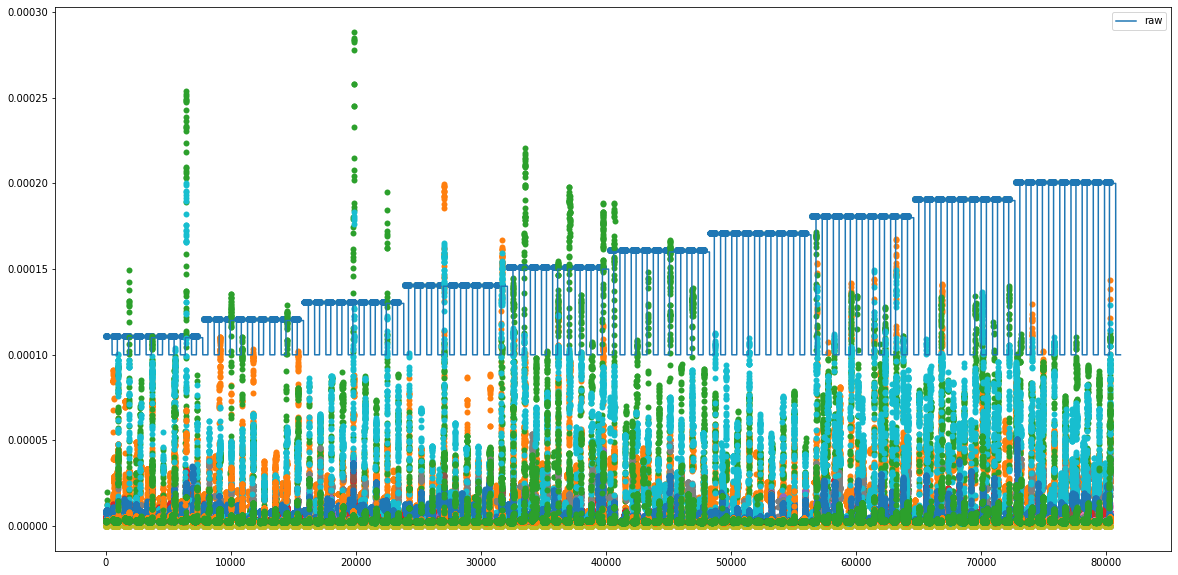

In [134]:
index = []
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(trainy_raw*0.00001+0.0001)
line1.set_label('raw')

index = trainy_tran.index
plt.scatter(index, trainy_tran*0.00001+0.0001+0.000001, linewidths=0.0000001)

for i in tqdm(range(0,12)):
    plt.scatter(index, trainx_tran[str(i)], linewidths=0.0000001)
    
ax.legend()
plt.show();

### Test data set

In [135]:
current_index_list = []
last_value = 1
current_value = 0
testx_tran = deepcopy(testx_raw)
testy_tran = deepcopy(testy_raw)

for i in tqdm(range(0, len(testy_raw))):
    
    current_value = testy_raw.iloc[i,0]
    if current_value == last_value:
        last_value = current_value

        current_index_list.append(i)
        if i == len(testy_raw) - 1:
            testx_tran = testx_tran.drop(current_index_list)
            testy_tran = testy_tran.drop(current_index_list)
    else:
        last_value = current_value
        for j in range(0,14*5):
            current_index_list = np.delete(current_index_list, 0)
        if current_value == 0:
            testx_tran = testx_tran.drop(current_index_list)
            testy_tran = testy_tran.drop(current_index_list)
            
            current_index_list = []
            current_index_list.append(i)
        else:
            testy_tran.loc[current_index_list, '0'] = current_value
            current_index_list = []
            current_index_list.append(i)
    
    # if i == 182:
    #     break

In [136]:
zero_arr = []
for i in range(0, len(testy_tran)):
    if testy_tran.iloc[i, 0] == 0:
        zero_arr.append(testy_tran.index[i])

testx_tran = testx_tran.drop(zero_arr)
testy_tran = testy_tran.drop(zero_arr)

#### check the raw label and adjusted label

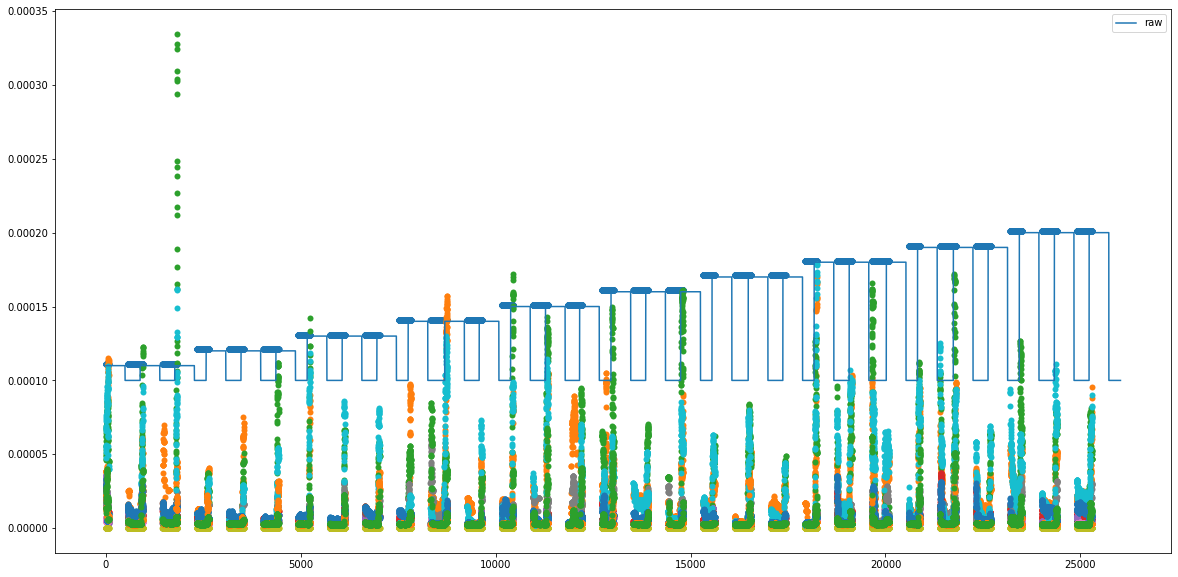

In [137]:
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(testy_raw*0.00001+0.0001)
line1.set_label('raw')

index = testy_tran.index
plt.scatter(index, testy_tran*0.00001+0.0001+0.000001, linewidths=0.0000001)

for i in tqdm(range(0,12)):
    plt.scatter(index, testx_tran[str(i)], linewidths=0.0000001)

ax.legend()
plt.show();

### reindex new train/test data set

In [138]:
trainx_tran = trainx_tran.reset_index(drop=True)
trainy_tran = trainy_tran.reset_index(drop=True)
testx_tran = testx_tran.reset_index(drop=True)
testy_tran = testy_tran.reset_index(drop=True)

## train/test model

In [139]:
# train/test model
lightGBM_model = ltb.LGBMClassifier()
lightGBM_model.fit(trainx_tran,trainy_tran)
expected1 = testy_tran.values.flatten()
predicted1 = lightGBM_model.predict(testx_tran)
counter = 0
for i in range(0, len(expected1)):
    if expected1[i] == predicted1[i]:
        counter += 1

accuracy = counter/len(expected1)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [140]:
name = '200ms right'
acc_arr.append(accuracy)
name_arr.append(name)

# 300ms right of turning point

## Raw training data(after overlapped windows)

In [141]:
trainx_raw = pd.read_csv('featured_data/step10ms/combined_trainx.csv')
trainy_raw = pd.read_csv('featured_data/step10ms/combined_trainy.csv')

## Raw testing data(after overlapped windows)

In [142]:
testx_raw = pd.read_csv('featured_data/step10ms/combined_testx.csv')
testy_raw = pd.read_csv('featured_data/step10ms/combined_testy.csv')

## Find transition zone train/test data

### Train data set

In [143]:
current_index_list = []
last_value = 1
current_value = 0
trainx_tran = deepcopy(trainx_raw)
trainy_tran = deepcopy(trainy_raw)

for i in tqdm(range(0, len(trainy_raw))):
    current_value = trainy_raw.iloc[i,0]
    if current_value == last_value:
        last_value = current_value

        current_index_list.append(i)
        if i == len(trainy_raw) - 1:
            trainx_tran = trainx_tran.drop(current_index_list)
            trainy_tran = trainy_tran.drop(current_index_list)
    else:
        last_value = current_value
        for j in range(0,21*5):
            current_index_list = np.delete(current_index_list, 0)
        if current_value == 0:
            trainx_tran = trainx_tran.drop(current_index_list)
            trainy_tran = trainy_tran.drop(current_index_list)
            
            current_index_list = []
            current_index_list.append(i)
        else:
            trainy_tran.loc[current_index_list, '0'] = current_value
            current_index_list = []
            current_index_list.append(i)

In [144]:
zero_arr = []
for i in range(0, len(trainy_tran)):
    if trainy_tran.iloc[i, 0] == 0:
        zero_arr.append(trainy_tran.index[i])

trainx_tran = trainx_tran.drop(zero_arr)
trainy_tran = trainy_tran.drop(zero_arr)

#### check the raw label and adjusted label

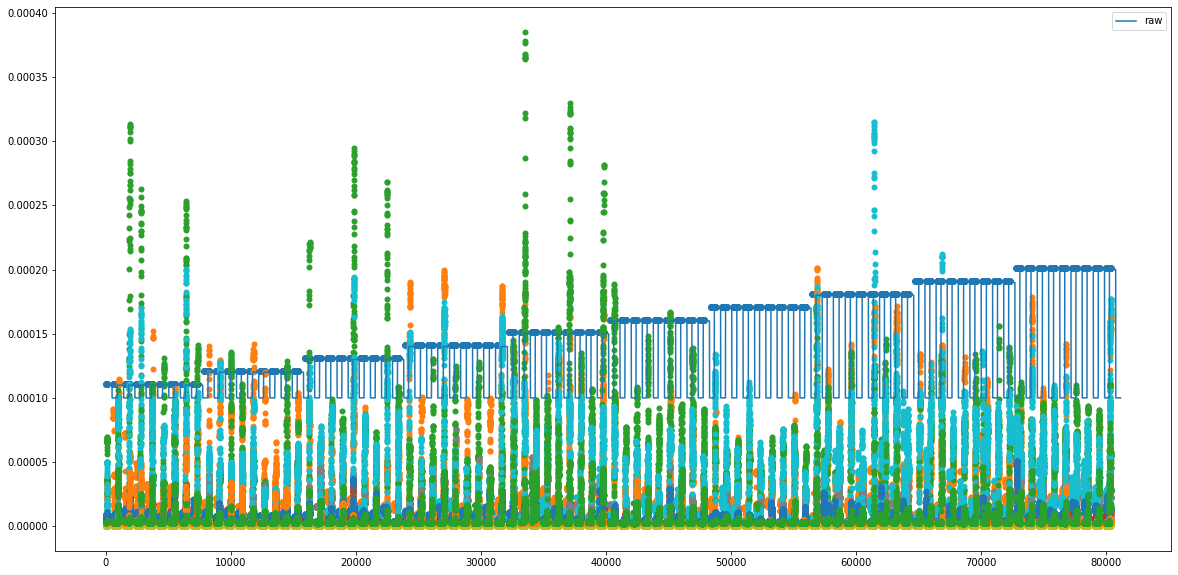

In [145]:
index = []
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(trainy_raw*0.00001+0.0001)
line1.set_label('raw')

index = trainy_tran.index
plt.scatter(index, trainy_tran*0.00001+0.0001+0.000001, linewidths=0.0000001)

for i in tqdm(range(0,12)):
    plt.scatter(index, trainx_tran[str(i)], linewidths=0.0000001)
    
ax.legend()
plt.show();

### Test data set

In [146]:
current_index_list = []
last_value = 1
current_value = 0
testx_tran = deepcopy(testx_raw)
testy_tran = deepcopy(testy_raw)

for i in tqdm(range(0, len(testy_raw))):
    
    current_value = testy_raw.iloc[i,0]
    if current_value == last_value:
        last_value = current_value

        current_index_list.append(i)
        if i == len(testy_raw) - 1:
            testx_tran = testx_tran.drop(current_index_list)
            testy_tran = testy_tran.drop(current_index_list)
    else:
        last_value = current_value
        for j in range(0,21*5):
            current_index_list = np.delete(current_index_list, 0)
        if current_value == 0:
            testx_tran = testx_tran.drop(current_index_list)
            testy_tran = testy_tran.drop(current_index_list)
            
            current_index_list = []
            current_index_list.append(i)
        else:
            testy_tran.loc[current_index_list, '0'] = current_value
            current_index_list = []
            current_index_list.append(i)
    
    # if i == 182:
    #     break

In [147]:
zero_arr = []
for i in range(0, len(testy_tran)):
    if testy_tran.iloc[i, 0] == 0:
        zero_arr.append(testy_tran.index[i])

testx_tran = testx_tran.drop(zero_arr)
testy_tran = testy_tran.drop(zero_arr)

#### check the raw label and adjusted label

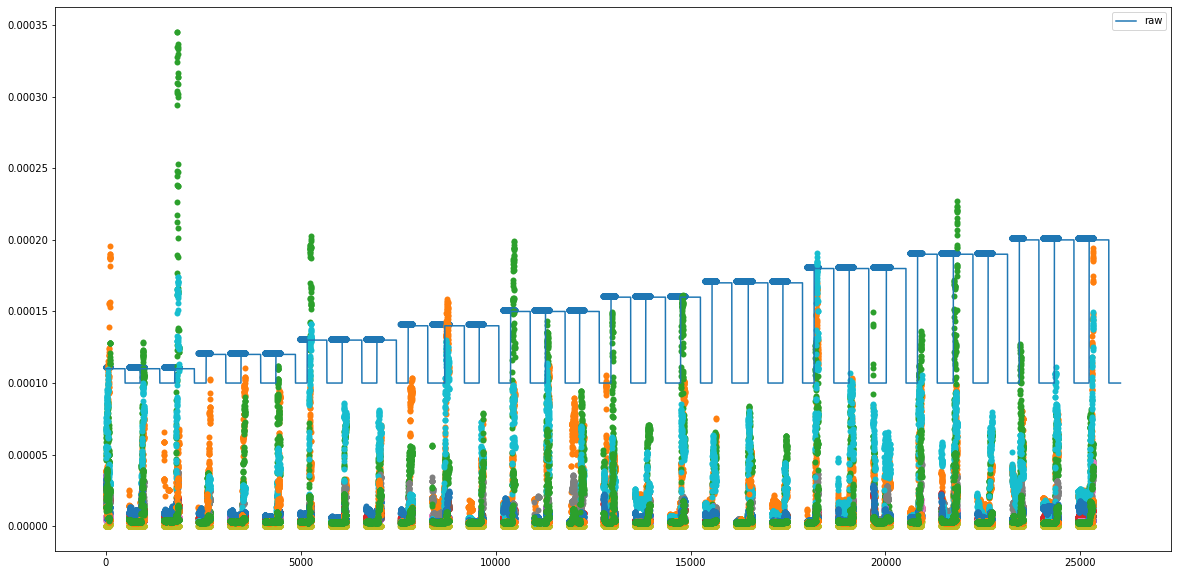

In [148]:
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(testy_raw*0.00001+0.0001)
line1.set_label('raw')

index = testy_tran.index
plt.scatter(index, testy_tran*0.00001+0.0001+0.000001, linewidths=0.0000001)

for i in tqdm(range(0,12)):
    plt.scatter(index, testx_tran[str(i)], linewidths=0.0000001)

ax.legend()
plt.show();

### reindex new train/test data set

In [149]:
trainx_tran = trainx_tran.reset_index(drop=True)
trainy_tran = trainy_tran.reset_index(drop=True)
testx_tran = testx_tran.reset_index(drop=True)
testy_tran = testy_tran.reset_index(drop=True)

## train/test model

In [150]:
# train/test model
lightGBM_model = ltb.LGBMClassifier()
lightGBM_model.fit(trainx_tran,trainy_tran)
expected1 = testy_tran.values.flatten()
predicted1 = lightGBM_model.predict(testx_tran)
counter = 0
for i in range(0, len(expected1)):
    if expected1[i] == predicted1[i]:
        counter += 1

accuracy = counter/len(expected1)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [151]:
name = '300ms right'
acc_arr.append(accuracy)
name_arr.append(name)

# Final results

In [152]:
acc_arr
name_arr

[0.3543336791474111,
 0.36125211505922167,
 0.38742621568443736,
 0.4313597310422114]

['All Left', '100ms right', '200ms right', '300ms right']

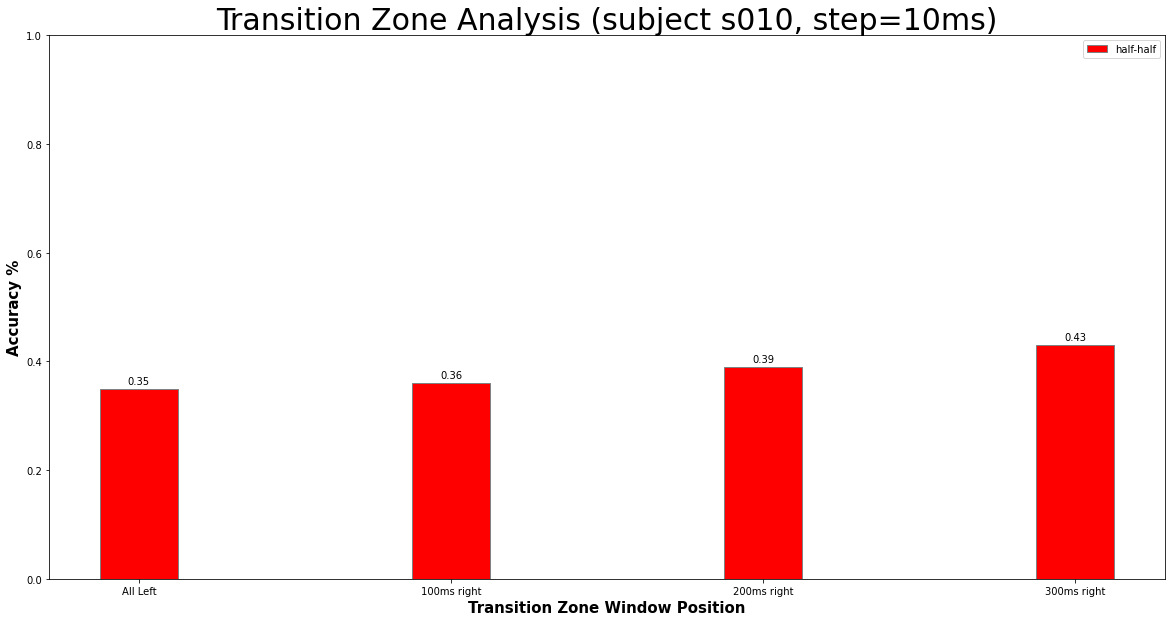

In [153]:
# set width of bar
barWidth = 0.25
fig,ax = plt.subplots(figsize =(20, 10))

# set height of bar
# acc_arr

# Set position of bar on X axis
br1 = np.arange(len(acc_arr))

# Make the plot
half = ax.bar(br1, np.round(acc_arr, 2), color ='r', width = barWidth, edgecolor ='grey', label ='half-half')
for p in half:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

# Adding Xticks
ax.set_xlabel('Transition Zone Window Position', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Accuracy %', fontweight ='bold', fontsize = 15)
ax.set_xticks(br1)
ax.set_xticklabels(name_arr)

ax.set_ylim(0, 1)
ax.set_title('Transition Zone Analysis (subject s010, step=10ms)',size=30)
ax.legend()
plt.show();